# **Import Packages**

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading Datasets**

In [ ]:
data_index = pd.read_csv("data/indices_30min_filled.csv")
data_index = data_index.set_index("date")

In [ ]:
data_stock = pd.read_csv("data/stock_30min_official_trading_filled_missing(ffill).csv")
data_stock = data_stock.set_index("date")

In [ ]:
data_etf = pd.read_csv("data/etfs_filled.csv").drop(columns = ["Unnamed: 0"])
remove_assets = ["GOVT","IEF", "IEI", "UVXY", "VIXM", "VIXY","VXX"]
data_etf = data_etf.drop(columns = remove_assets)
data_etf = data_etf.set_index("date")

In [ ]:
data_crypto = pd.read_csv("data/crypto_30min_filled_missing_value(ffill).csv")
data_crypto = data_crypto.set_index("date")

# **Converting Prices into Returns**

In [ ]:

# Find log-returns of the market index
names_index = data_index.columns
numpy_data = data_index.to_numpy()
original = numpy_data[:-1]
onelag = numpy_data[1:]
logreturns = np.log(onelag) - np.log(original)

return_index = pd.DataFrame(data = logreturns, columns = names_index)
return_index["date"] = data_index.index[1:]
return_index = return_index.set_index(['date'])


In [ ]:

# Find log-returns of stocks
names_stock = data_stock.columns
numpy_data = data_stock.to_numpy()
original = numpy_data[:-1]
onelag = numpy_data[1:]
logreturns = np.log(onelag) - np.log(original)

return_stock = pd.DataFrame(data = logreturns, columns = names_stock)
return_stock["date"] = data_stock.index[1:]
return_stock = return_stock.set_index(['date'])


In [ ]:
# Find log-returns of US ETFs
names_etf = data_etf.columns
numpy_data = data_etf.to_numpy()
original = numpy_data[:-1]
onelag = numpy_data[1:]
logreturns = np.log(onelag) - np.log(original)

return_etf = pd.DataFrame(data = logreturns, columns = names_etf)
return_etf["date"] = data_etf.index[1:]
return_etf = return_etf.set_index(['date'])


In [ ]:

# Find log-returns of Cryptocurrencies
names_crypto = data_crypto.columns
numpy_data = data_crypto.to_numpy()
original = numpy_data[:-1]
onelag = numpy_data[1:]
logreturns = np.log(onelag) - np.log(original)

return_crypto = pd.DataFrame(data = logreturns, columns = names_crypto)
return_crypto["date"] = data_crypto.index[1:]
return_crypto = return_crypto.set_index(['date'])


In [ ]:
return_index = return_index[:-39] # Remove redundant observations

# **Calculating the Beta Score for each Asset in each Type of Investment Vehicle**

**Cryptocurency vs Bitcoin**

In [ ]:
beta_cryptos = [] # Calculate the beta scores for cryptocurrencies relatively to Bitcoin

for i in names_crypto:
  array_cov = np.cov(return_crypto[i].values, return_crypto["BTC"].values)
  beta_cryptos.append(array_cov[0][1]/array_cov[1][1])

beta_crypto_pandas = pd.DataFrame(data = np.array([names_crypto, beta_cryptos]).T, columns = ["crypto", "beta score bitcoin"])

In [ ]:
beta_crypto_pandas.drop(index=[19]) # Exclude UST as it does not have a full period like others


**Cryptocurrency vs SP500**

In [ ]:
beta_cryptos_sp500 = [] # Calculate the beta scores for cryptocurrencies relatively to SP500

for i in names_crypto:
  array_cov = np.cov(return_crypto[i].values, return_index["SPX"].values)
  beta_cryptos_sp500.append(array_cov[0][1]/array_cov[1][1])

beta_crypto_sp500_pandas = pd.DataFrame(data = np.array([names_crypto, beta_cryptos_sp500]).T, columns = ["crypto", "beta score sp500"])

In [ ]:
beta_crypto_sp500_pandas.drop(index=[19]) # Exclude UST as it does not have a full period like others


,crypto,beta score sp500
0,ADA,0.068688
1,BAT,0.098275
2,BCH,0.035825
3,BNT,0.051319
4,BSV,0.033241
5,BTC,0.005964
6,DAI,-0.009612
7,DASH,0.058664
8,DOGE,-0.1611
9,EOS,0.039923


**Stock vs SP500**

In [ ]:
beta_stock_sp500 = [] # Calculate the beta scores for stocks relatively to SP500

for i in names_stock:
  array_cov = np.cov(return_stock[i].values, return_index["SPX"].values)
  beta_stock_sp500.append(array_cov[0][1]/array_cov[1][1])

beta_stock_sp500_pandas = pd.DataFrame(data = np.array([names_stock, beta_stock_sp500]).T, columns = ["stock", "beta score sp500"])

**ETFs vs SP500**

In [ ]:
beta_etf_sp500 = [] # Calculate the beta scores for US ETFs relatively to SP500

for i in names_etf:
  array_cov = np.cov(return_etf[i].values, return_index["SPX"].values)

  beta_etf_sp500.append(array_cov[0][1]/array_cov[1][1])

beta_etf_sp500_pandas = pd.DataFrame(data = np.array([names_etf, beta_etf_sp500]).T, columns = ["etf", "beta score sp500"])

# **Analysing beta scores for each market**

In [ ]:
stock_beta = pd.to_numeric(beta_stock_sp500_pandas["beta score sp500"]).values
etf_beta = pd.to_numeric(beta_etf_sp500_pandas["beta score sp500"]).values
crypto_beta = pd.to_numeric(beta_crypto_sp500_pandas.drop(index = [19])["beta score sp500"]).values
crypto_btc = pd.to_numeric(beta_crypto_pandas.drop(index = [19])["beta score bitcoin"]).values

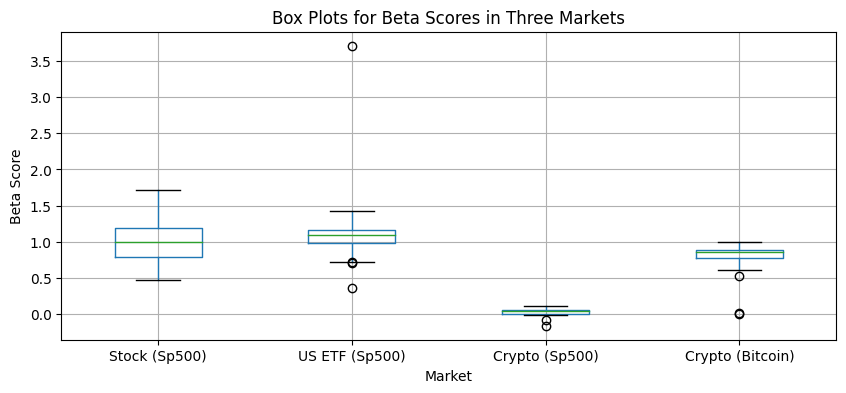

In [ ]:
# Create a DataFrame
data = {
    'Stock (Sp500)': pd.Series(stock_beta),
    'US ETF (Sp500)': pd.Series(etf_beta),
    'Crypto (Sp500)': pd.Series(crypto_beta),
    'Crypto (Bitcoin)': pd.Series(crypto_btc)
}

df = pd.DataFrame(data)

# Plot the box plots
plt.figure(figsize=(10, 4))
df.boxplot()
plt.title('Box Plots for Beta Scores in Three Types of Investment Vehicle')
plt.ylabel('Beta Score')
plt.xlabel('Investment Vehicle')